In [1]:
import pandas as pd  #판다스
from sklearn.linear_model import LogisticRegression #로지스틱 회귀 모델
from sklearn.tree import DecisionTreeClassifier #의사결정 나무 모델


In [2]:
#데이터 불러오기


train=pd.read_csv('../input/titanic/train.csv') #모델 학습
test=pd.read_csv('../input/titanic/test.csv') #모델 시험지
submission=pd.read_csv('../input/titanic/gender_submission.csv') #답안지

In [3]:
#EDA
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
submission.head()  #여성 1 남성0

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
print(train.shape) #속성은 괄호가 없다.
print(test.shape)
print(submission.shape)

(891, 12)
(418, 11)
(418, 2)


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
print(train.describe())
print(test.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

In [11]:
#describe()는 데이터프레임
#value_counts 는 시리즈에서만 실행 시리즈는 하나의 열
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
train['Embarked'].unique() #유니크도 시리즈만

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
train.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [14]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


<AxesSubplot:xlabel='Pclass'>

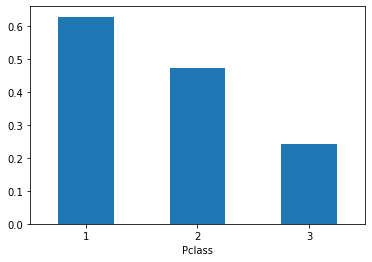

In [15]:
#시각화
#pd.Series.plot(kind='bar')

train.groupby('Pclass').mean()['Survived'].plot(kind='bar', rot=0)  #rot=0 x축 돌아간거 수정 45는 비스듬히

<AxesSubplot:ylabel='Frequency'>

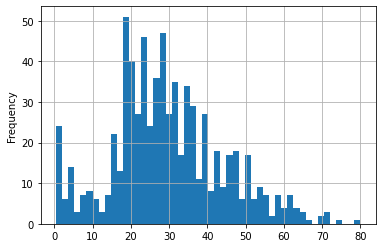

In [16]:
train['Age'].plot(kind='hist',bins=50,grid=True) #bins 도수를 더 잘게 나눔 보조선까지 추가

<AxesSubplot:xlabel='Age', ylabel='Fare'>

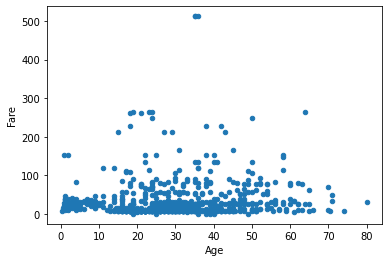

In [17]:
train.plot(x='Age',y='Fare',kind='scatter')

In [18]:
##데이터 전처리 //결측값 처리 공부
train.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
train['Age'].median()

28.0

In [20]:
train['Age'].fillna(28)#이것만 쓰면 저장이 안됨!
train['Age']=train['Age'].fillna(28)

In [21]:
train.isna().sum()# Age 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
train['Embarked']=train['Embarked'].fillna('S')

In [24]:
train.isna().sum()# Embarked 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [25]:
#pd.Series.map() #시리즈 내 값을 변환할 떄 사용하는 함수

train['Sex']=train['Sex'].map({'male':0,'female':1})

In [26]:
train['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [27]:
#X -> MODEL -> y
X_train=train[['Sex','Pclass']]
y_train=train['Survived']

In [28]:
test['Sex']=test['Sex'].map({'male':0,'female':1})
X_test=test[['Sex','Pclass']]

In [29]:
X_test

,Sex,Pclass
0,0,3
1,1,3
2,0,2
3,0,3
4,1,3
...,...,...
413,0,3
414,1,1
415,0,3
416,0,3


In [30]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()

In [31]:
lr.fit(X_train,y_train)

LogisticRegression()

In [32]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
lr_pred=lr.predict_proba(X_test)[:,1]

In [34]:
dt_pred=dt.predict_proba(X_test)[:,1] 

In [35]:
submission['Survived']=lr_pred
submission

,PassengerId,Survived
0,892,0.102021
1,893,0.593544
2,894,0.224759
3,895,0.102021
4,896,0.593544
...,...,...
413,1305,0.102021
414,1306,0.904848
415,1307,0.102021
416,1308,0.102021


In [36]:
submission.to_csv('logistic_regression_pred.csv',index=False) #False 안하면 행을 나타내는 인덱스가 같이 저장됨

In [37]:
submission['Survived']=dt_pred
submission

,PassengerId,Survived
0,892,0.135447
1,893,0.500000
2,894,0.157407
3,895,0.135447
4,896,0.500000
...,...,...
413,1305,0.135447
414,1306,0.968085
415,1307,0.135447
416,1308,0.135447


In [38]:
submission.to_csv('decision_tree_pred.csv',index=False)